In [2]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\shann\\Documents\\bird_migration_dataset.csv")

# Display the first few rows
df.head()


,Timestamp,Species,Latitude,Longitude,Speed_kmh,Altitude_m,Temperature_C,Wind_Speed_mps
0,2024-01-01 00:00:00,Whooping Crane,57.855968,-105.088970,29.59,2954.92,17.44,3.88
1,2024-01-01 00:30:00,Arctic Tern,56.988955,-107.244475,36.79,2760.67,-1.81,7.87
2,2024-01-01 01:00:00,Arctic Tern,54.910968,-101.879439,33.26,1928.49,22.81,4.08
3,2024-01-01 01:30:00,Snow Goose,64.902712,-97.668528,42.03,556.53,14.83,4.86
4,2024-01-01 02:00:00,Barn Swallow,57.155274,-95.808192,27.38,357.93,14.99,6.88


In [4]:
import folium

# Filter migration data for a specific bird species
bird_species = "Arctic Tern"
bird_data = df[df["Species"] == bird_species]

# Create a base map
m = folium.Map(location=[bird_data.iloc[0]["Latitude"], bird_data.iloc[0]["Longitude"]], zoom_start=5)

# Add migration points
for _, row in bird_data.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=f"{row['Species']} - {row['Speed_kmh']} km/h",
        icon=folium.Icon(color="blue", icon="info-sign"),
    ).add_to(m)

# Show the map
m


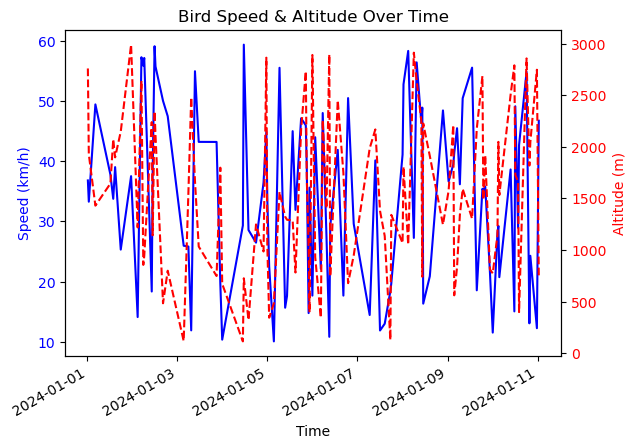

In [5]:
import matplotlib.pyplot as plt

# Select one bird species
bird_data = df[df["Species"] == "Arctic Tern"].copy()

# Convert Timestamp to datetime
bird_data["Timestamp"] = pd.to_datetime(bird_data["Timestamp"])

# Plot Speed & Altitude
fig, ax1 = plt.subplots()

ax1.set_xlabel("Time")
ax1.set_ylabel("Speed (km/h)", color="blue")
ax1.plot(bird_data["Timestamp"], bird_data["Speed_kmh"], color="blue", label="Speed")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()  
ax2.set_ylabel("Altitude (m)", color="red")
ax2.plot(bird_data["Timestamp"], bird_data["Altitude_m"], color="red", linestyle="dashed", label="Altitude")
ax2.tick_params(axis='y', labelcolor="red")

fig.autofmt_xdate()
plt.title("Bird Speed & Altitude Over Time")
plt.show()


In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data (time vs. location)
bird_data = df[df["Species"] == "Arctic Tern"]
X = np.array(range(len(bird_data))).reshape(-1, 1)
y_lat = bird_data["Latitude"].values
y_lon = bird_data["Longitude"].values

# Train models
lat_model = LinearRegression().fit(X, y_lat)
lon_model = LinearRegression().fit(X, y_lon)

# Predict next 5 locations
future_steps = np.array(range(len(bird_data), len(bird_data) + 5)).reshape(-1, 1)
predicted_lat = lat_model.predict(future_steps)
predicted_lon = lon_model.predict(future_steps)

# Display predictions
print("Predicted future locations (Latitude, Longitude):")
for lat, lon in zip(predicted_lat, predicted_lon):
    print(f"({lat:.5f}, {lon:.5f})")


Predicted future locations (Latitude, Longitude):
(61.53793, -100.63015)
(61.55637, -100.63220)
(61.57481, -100.63425)
(61.59325, -100.63631)
(61.61169, -100.63836)


In [11]:
df.to_csv("updated_bird_migration_data.csv", index=False)
print("Updated dataset saved!")


Updated dataset saved!
